# Loan Application Status Prediction

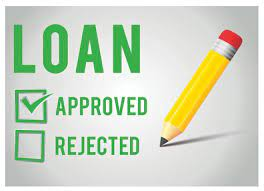

## Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

### Importing the liabaries

In [1]:

# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# First 10 rows
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Sample
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
62,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N
310,LP002002,Female,No,0,Graduate,No,2917,0.0,84.0,360.0,1.0,Semiurban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y


In [6]:
df.shape

(614, 13)

##### This dataset contains 614 rows and 13 columns.

### Preprocessing & EDA

In [7]:
# Column Names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.shape

(614, 13)

In [9]:
# Column Data Types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see that most of the datatypes are object datatypes and a few integer & float datatypes.

In [10]:
# Checking for null values
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Sum of null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

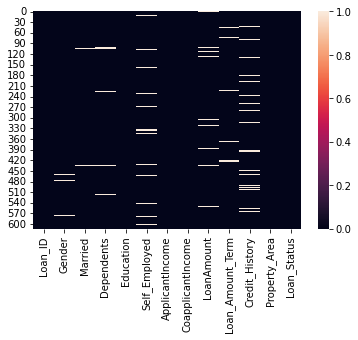

In [12]:
# Visualizing the null values
sns.heatmap(df.isnull())

### Treating the Null values


Since Gender, Married, Dependents, Self_Employed,Loan_Amount_Term & Credit_History are categorical columns,we shall replace the null values in these columns with the mode of the respective columns.

In [13]:
# Modes of categorical columns
print("The mode of Gender is:",df["Gender"].mode())
print("The mode of Married is:",df["Married"].mode())
print("The mode of Dependents is:",df["Dependents"].mode())
print("The mode of  Self_Employed  is:",df["Self_Employed"].mode())
print("The mode of Loan_Amount_Term is:",df["Loan_Amount_Term"].mode())
print("The mode of Credit_History  is:",df["Credit_History"].mode())

The mode of Gender is: 0    Male
Name: Gender, dtype: object
The mode of Married is: 0    Yes
Name: Married, dtype: object
The mode of Dependents is: 0    0
Name: Dependents, dtype: object
The mode of  Self_Employed  is: 0    No
Name: Self_Employed, dtype: object
The mode of Loan_Amount_Term is: 0    360.0
Name: Loan_Amount_Term, dtype: float64
The mode of Credit_History  is: 0    1.0
Name: Credit_History, dtype: float64


In [15]:
# Replacing null values in categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

Since LoanAmount column is a numerical column we shall replace the null values with median of this column.

In [16]:
# Median of numerical column
print("The median of LoanAmount is:",df["LoanAmount"].median())

The median of LoanAmount is: 128.0


In [17]:
# Filling null values in LoanAmount by its median value
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

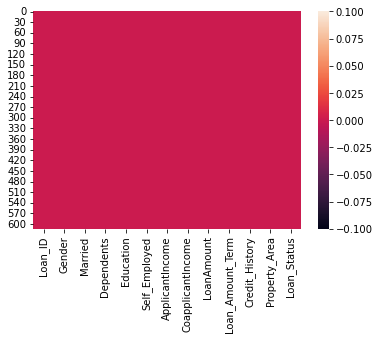

In [19]:
# Visualizing the null values
sns.heatmap(df.isnull())

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [21]:
# Mean of our target variable 'attrition'
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,149.890625,344.56250,0.572917
Y,5384.068720,1504.516398,143.869668,341.43128,0.983412


In [22]:
# Value counts of each column.
for i in df.columns:
        print(df[i].value_counts())
        print('-----------------------------------------------------')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
-----------------------------------------------------
Male      502
Female    112
Name: Gender, dtype: int64
-----------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64
-----------------------------------------------------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
-----------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
-----------------------------------------------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
-----------------------------------------------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
--------------------

The column Loan_ID is the unique ID given to the applicants also it has no significane in the prediction so we shall drop this column.

In [23]:
# Removing unwanted column
df.drop("Loan_ID",axis=1,inplace=True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [27]:
# Unique values
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [28]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [29]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [30]:
#Checking for any empty observation in target column
df.loc[df['Loan_Status'] == " "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


No empty observations.

### Data Visualization

In [31]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### UniVariate Analysis

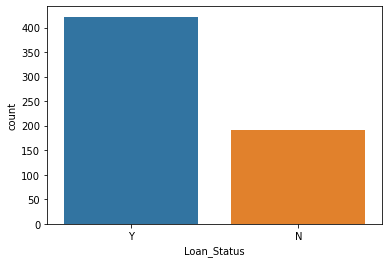

In [32]:
sns.countplot(df['Loan_Status'])
plt.show()


Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:ylabel='Gender'>

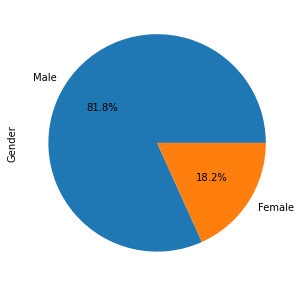

In [34]:
plt.figure(figsize=(10,5))
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:ylabel='Married'>

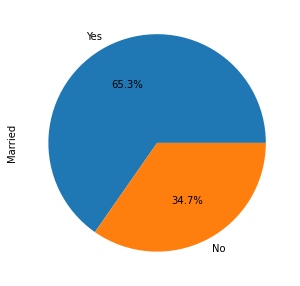

In [35]:
plt.figure(figsize=(10,5))
print(df['Married'].value_counts())
df['Married'].value_counts().plot.pie(autopct='%1.1f%%')

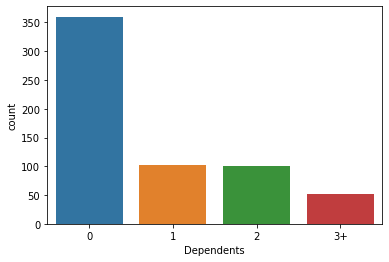

In [36]:
sns.countplot(df['Dependents'])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:ylabel='Education'>

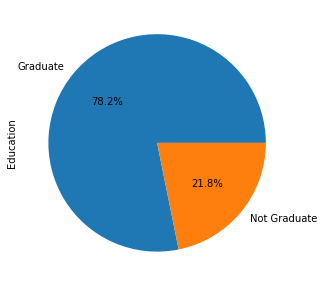

In [37]:
plt.figure(figsize=(10,5))
print(df['Education'].value_counts())
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')

No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:ylabel='Self_Employed'>

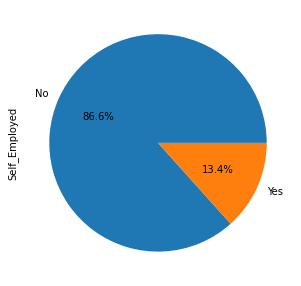

In [38]:
plt.figure(figsize=(10,5))
print(df['Self_Employed'].value_counts())
df['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

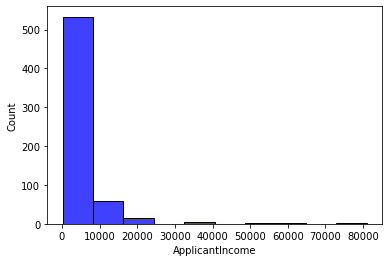

In [43]:
sns.histplot(data=df,x="ApplicantIncome",bins=10,color='blue')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

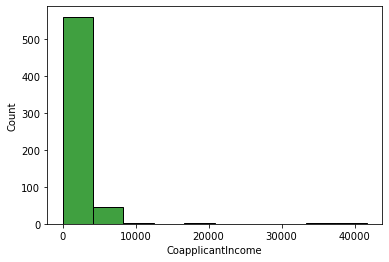

In [45]:
sns.histplot(data=df,x="CoapplicantIncome",bins=10,color='green')

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

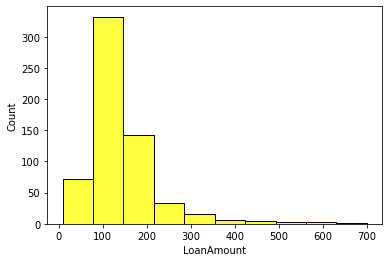

In [47]:
sns.histplot(data=df,x="LoanAmount",bins=10,color='yellow')

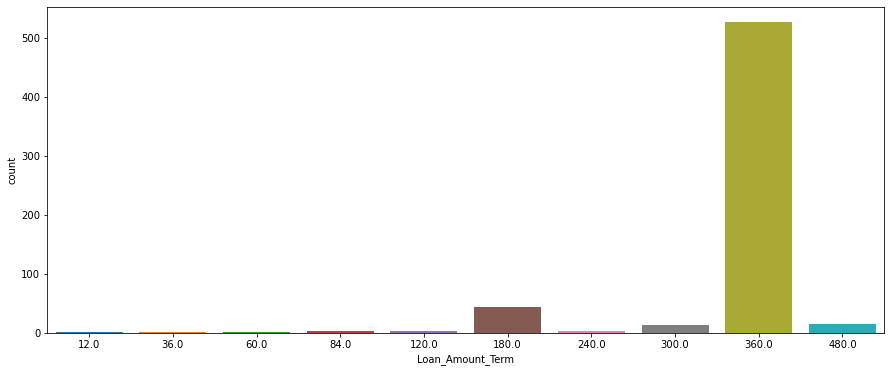

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(df['Loan_Amount_Term'])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:ylabel='Credit_History'>

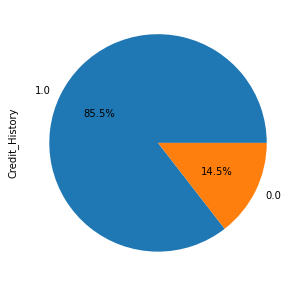

In [49]:
plt.figure(figsize=(10,5))
print(df['Credit_History'].value_counts())
df['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%')

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:ylabel='Property_Area'>

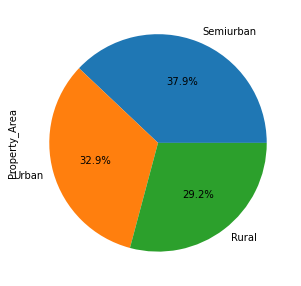

In [52]:
plt.figure(figsize=(10,5))
print(df['Property_Area'].value_counts())
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')

### Bi-Variate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

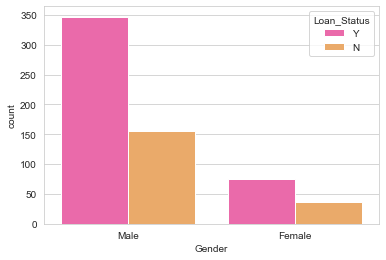

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Loan_Status',data=df,palette='spring')

<AxesSubplot:xlabel='Married', ylabel='count'>

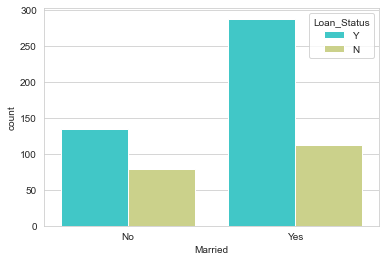

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Married',hue='Loan_Status',data=df,palette='rainbow')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

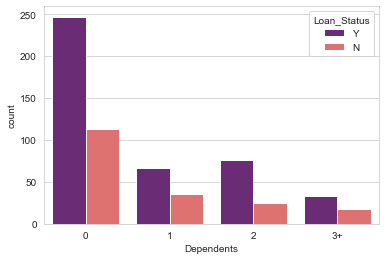

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Dependents',hue='Loan_Status',data=df,palette='magma')

<AxesSubplot:xlabel='Education', ylabel='count'>

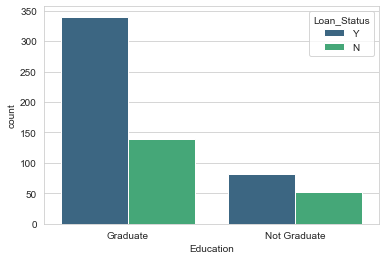

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='viridis')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

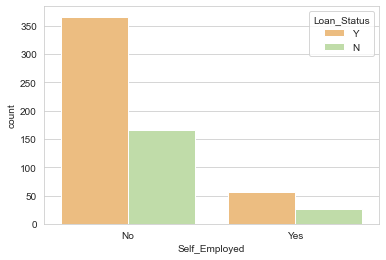

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,palette='Spectral')

<AxesSubplot:title={'center':'Comparision ApplicantIncome and CoapplicantIncome'}, xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

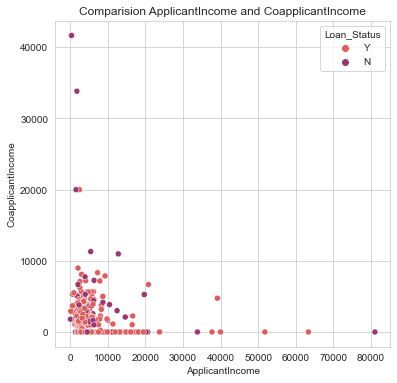

In [62]:
plt.figure(figsize=[6,6])
plt.title('Comparision ApplicantIncome and CoapplicantIncome')
sns.scatterplot(df['ApplicantIncome'],df['CoapplicantIncome'],hue=df["Loan_Status"],palette='flare')

<AxesSubplot:title={'center':'Comparision LoanAmount and Loan_Amount_Term'}, xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

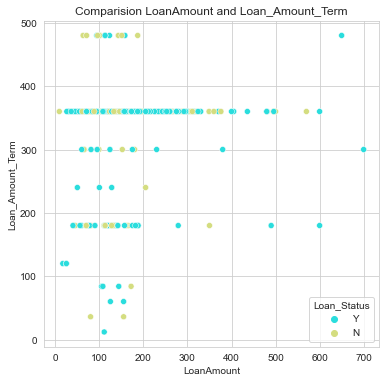

In [64]:
plt.figure(figsize=[6,6])
plt.title('Comparision LoanAmount and Loan_Amount_Term')
sns.scatterplot(df['LoanAmount'],df['Loan_Amount_Term'],hue=df["Loan_Status"],palette='rainbow')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

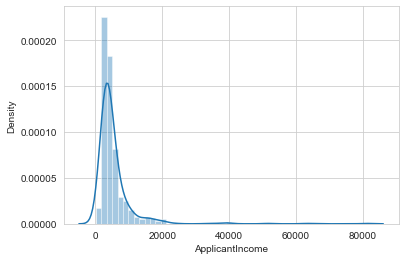

In [66]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

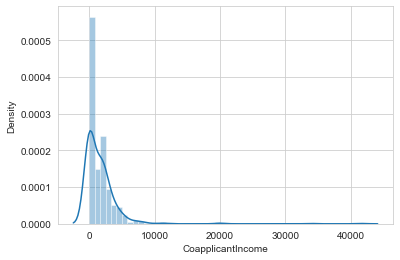

In [67]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

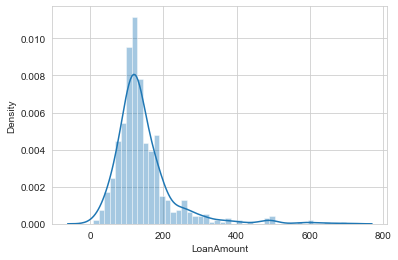

In [68]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

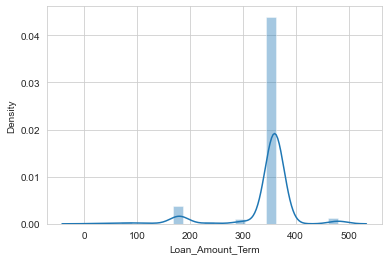

In [69]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

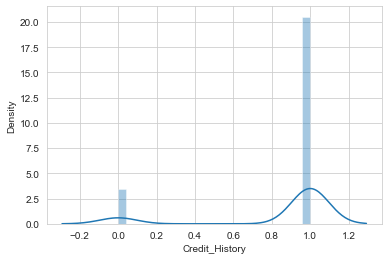

In [70]:
sns.distplot(df['Credit_History'])

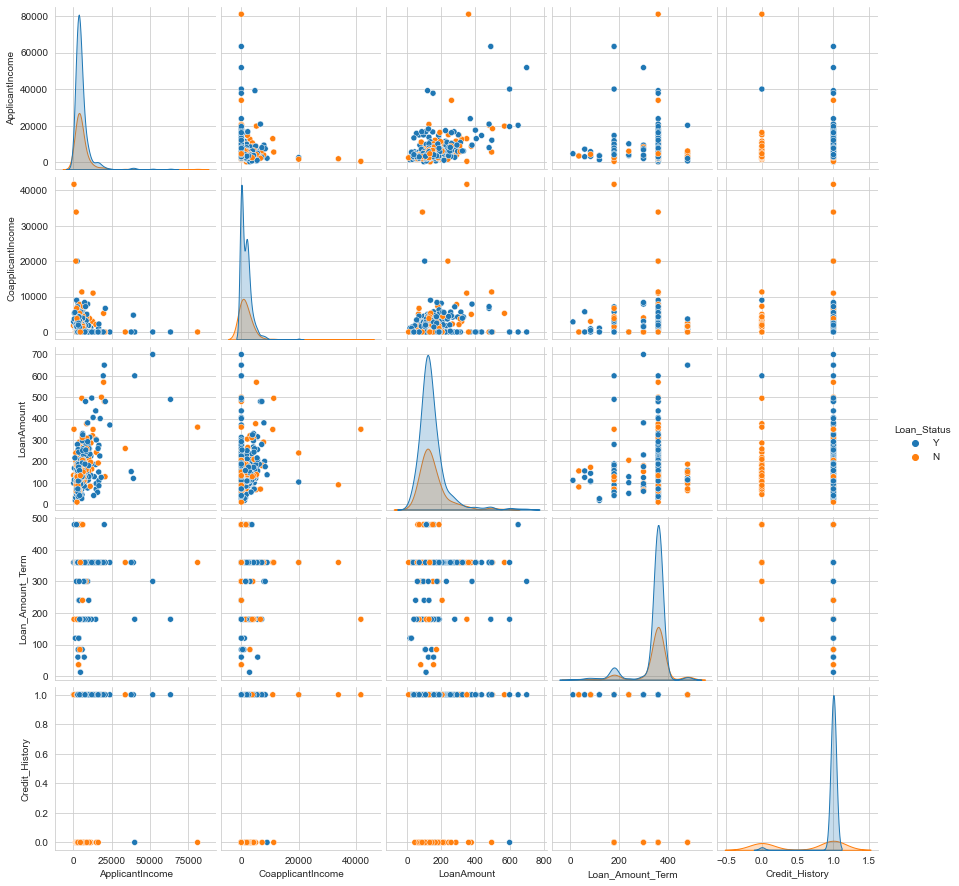

In [71]:
sns.pairplot(df,hue="Loan_Status")

### Encoding the Data Frame

In [72]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [73]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We shall use Label Encoder to encode the data for model building.

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [75]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


In [76]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


### Outliers

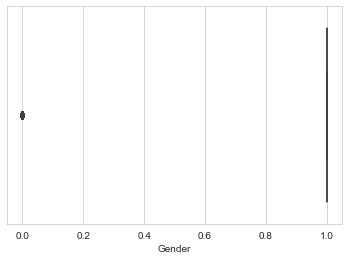

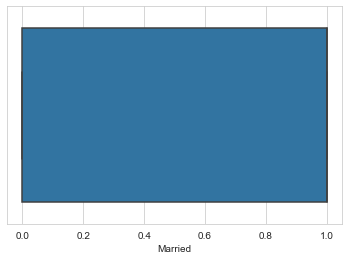

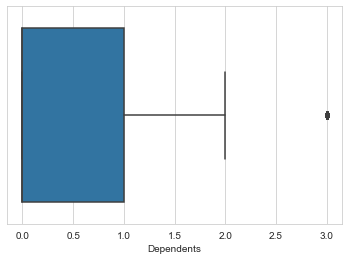

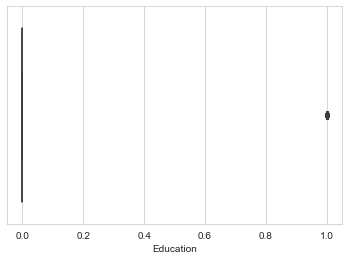

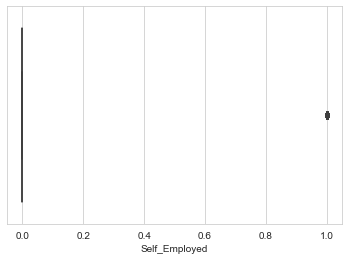

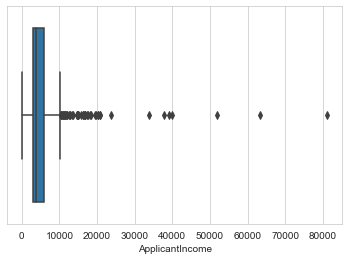

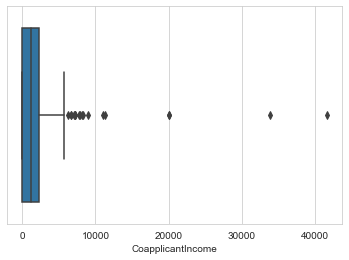

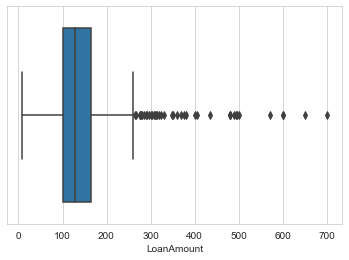

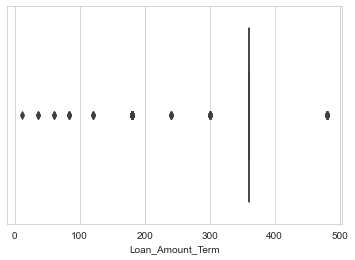

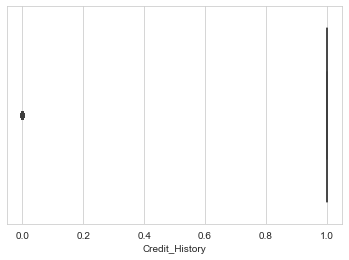

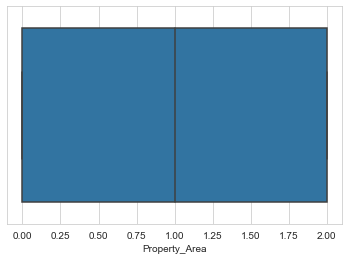

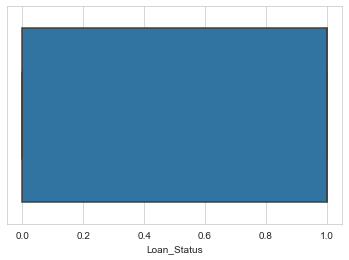

In [79]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

Gender                  AxesSubplot(0.125,0.536818;0.0596154x0.343182)
Married              AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
Dependents           AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
Education            AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
Self_Employed        AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
ApplicantIncome      AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
CoapplicantIncome    AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
LoanAmount           AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
Loan_Amount_Term     AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
Credit_History       AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
Property_Area        AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
Loan_Status                AxesSubplot(0.125,0.125;0.0596154x0.343182)
dtype: object

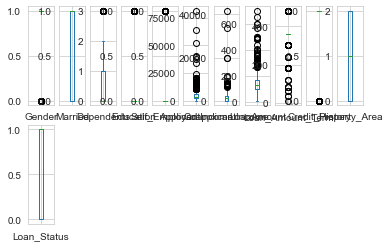

In [80]:
df.plot(kind='box',subplots=True,layout=(2,11))

We can see outliers present in Gender, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term & Credit_History.

### Removing Outliers

In [81]:
df_outliers=df[["Gender", "Dependents", "Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [82]:
df_new.shape

(577, 12)

In [83]:
df.shape

(614, 12)

In [84]:
Data_loss=((614-577)/614)*100
Data_loss

6.026058631921824

The data loss after z-score is 6.02 %.

### Checking skewness

In [85]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

 skewness is present in most of the columns.

In [86]:
df_skew=["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]


We shall use Power Transformer to remove skewness.

In [87]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')
df_new[df_skew] = scal.fit_transform(df_new[df_skew].values)
df_new[df_skew].skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
dtype: float64

In [88]:
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.130788,0.418513,2,1
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.130788,0.418513,0,0
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.130788,0.418513,2,1
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.130788,0.418513,2,1
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.130788,0.418513,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.130788,0.418513,0,1
610,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-2.562700,0.418513,0,1
611,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.130788,0.418513,2,1
612,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.130788,0.418513,2,1


In [89]:
df_new[np.abs(df_new)>0.25].all()

Gender               True
Married              True
Dependents           True
Education            True
Self_Employed        True
ApplicantIncome      True
CoapplicantIncome    True
LoanAmount           True
Loan_Amount_Term     True
Credit_History       True
Property_Area        True
Loan_Status          True
dtype: bool

### Correlation

In [90]:
df_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.183471,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.098370,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.349618,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.128399,0.019308,0.010595,0.089026
Dependents,0.183471,0.349618,1.000000,0.059728,0.069648,0.108178,0.023606,0.135297,-0.095181,-0.015924,0.040716,0.018517
Education,0.045696,0.024817,0.059728,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.062494,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.069648,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.052033,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.108178,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.089402,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.023606,0.049739,-0.087338,-0.360946,1.000000,0.200081,-0.000281,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.135297,-0.128715,0.117218,0.432154,0.200081,1.000000,0.021702,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.098370,-0.128399,-0.095181,-0.062494,-0.052033,-0.089402,-0.000281,0.021702,1.000000,-0.000146,-0.029931,-0.056610
Credit_History,0.013172,0.019308,-0.015924,-0.075217,-0.016390,0.028825,0.006564,-0.003626,-0.000146,1.000000,-0.008121,0.560936


In [91]:
df_new.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.018517
Gender               0.017408
ApplicantIncome     -0.002484
LoanAmount          -0.023609
Self_Employed       -0.026525
Loan_Amount_Term    -0.056610
Education           -0.092658
Name: Loan_Status, dtype: float64

<AxesSubplot:>

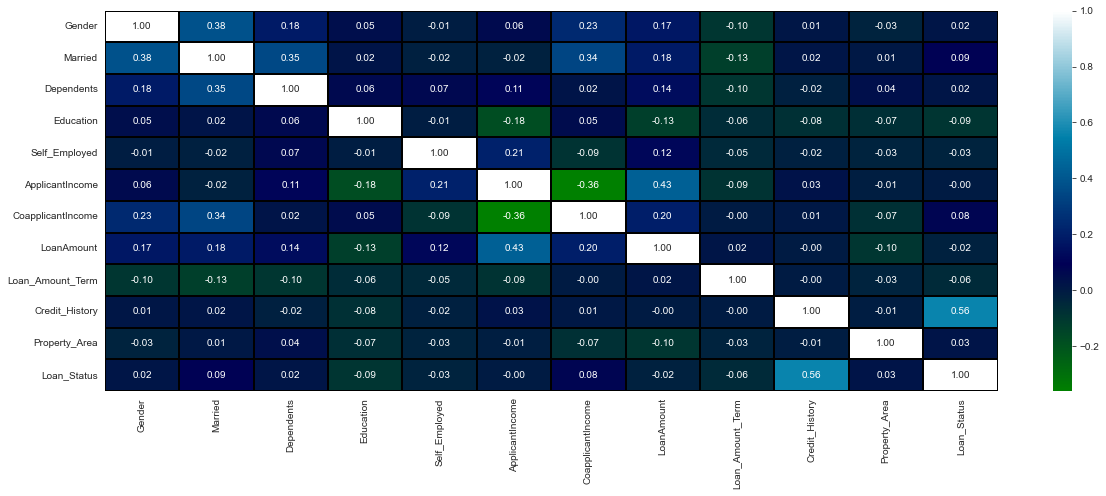

In [95]:
# Visualizing df_new_la.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_new.corr(),cmap='ocean',annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

From the above correlation heatmap, we see that Credit_History is highly positively correlated with our target variable Loan_Status. Also there is high positive correlation between LoanAmount & ApplicantIncome,Gender & Married, and Dependents & Married.

There is very less correlation between ApplicantIncome,LoanAmount,Loan_Amount_Term,Dependents & Gender with our target variable Loan_Status.

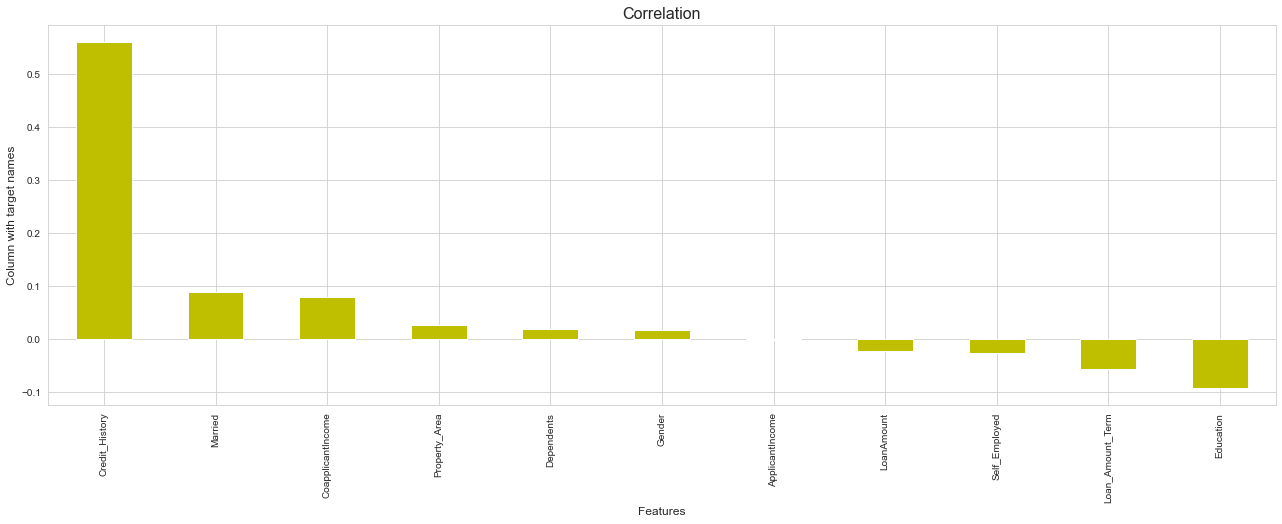

In [98]:
plt.figure(figsize=(22,7))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='y')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

### Model Building


In [99]:
x = df_new.drop("Loan_Status",axis=1)
y = df_new["Loan_Status"]


In [100]:
x.shape
(577, 11)


(577, 11)

In [101]:
y.shape

(577,)

### VIF

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Gender,1.218854
1,Married,1.431827
2,Dependents,1.183025
3,Education,1.060268
4,Self_Employed,1.055256
5,ApplicantIncome,1.763362
6,CoapplicantIncome,1.579512
7,LoanAmount,1.543185
8,Loan_Amount_Term,1.047798
9,Credit_History,1.008568


### Scaling

In [103]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.130788,0.418513,1.227472
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.130788,0.418513,-1.306522
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.130788,0.418513,1.227472
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.130788,0.418513,1.227472
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.130788,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.130788,0.418513,-1.306522
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-2.562700,0.418513,-1.306522
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.130788,0.418513,1.227472
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.130788,0.418513,1.227472


### SMOTE

In [104]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [105]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x , y = sm.fit_resample(x,y)

In [106]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

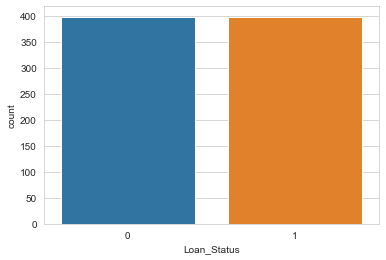

In [107]:
# Visualizing the data after oversampling
sns.countplot(y)

The data is balanced.

### Best Random State

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [109]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)


Best accuracy is : 0.799163179916318  on Random State : 68


In [110]:
# dividing the dataset for training and testing with best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=maxRS)

In [111]:
x_train.shape

(557, 11)

In [112]:
y_train.shape

(557,)

In [113]:
x_test.shape

(239, 11)

In [114]:
y_test.shape

(239,)

In [115]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [117]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))


accuracy score:  0.7824267782426778
[[ 71  31]
 [ 21 116]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       102
           1       0.79      0.85      0.82       137

    accuracy                           0.78       239
   macro avg       0.78      0.77      0.77       239
weighted avg       0.78      0.78      0.78       239



## Decision Tree Classifier

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.4309623430962343
[[ 99   3]
 [133   4]]
              precision    recall  f1-score   support

           0       0.43      0.97      0.59       102
           1       0.57      0.03      0.06       137

    accuracy                           0.43       239
   macro avg       0.50      0.50      0.32       239
weighted avg       0.51      0.43      0.28       239



## KNearest Neighbors Classifier

In [120]:

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)



In [121]:
print("accuracy score: ",accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

accuracy score:  0.7573221757322176
[[83 19]
 [39 98]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       102
           1       0.84      0.72      0.77       137

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.77      0.76      0.76       239



## GaussianNB Classifier

In [122]:

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
pred_gnb=gnb.predict(x_test)



In [123]:
print("accuracy score: ",accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

accuracy score:  0.7615062761506276
[[ 55  47]
 [ 10 127]]
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       102
           1       0.73      0.93      0.82       137

    accuracy                           0.76       239
   macro avg       0.79      0.73      0.74       239
weighted avg       0.78      0.76      0.75       239



## Random Forest Classifier

In [126]:

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)



In [128]:
print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.4895397489539749
[[101   1]
 [121  16]]
              precision    recall  f1-score   support

           0       0.45      0.99      0.62       102
           1       0.94      0.12      0.21       137

    accuracy                           0.49       239
   macro avg       0.70      0.55      0.42       239
weighted avg       0.73      0.49      0.39       239



## Support Vector Machine

In [129]:

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred = svc.predict(x_test)


In [130]:
print("accuracy score: ",accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy score:  0.7740585774058577
[[ 69  33]
 [ 21 116]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       102
           1       0.78      0.85      0.81       137

    accuracy                           0.77       239
   macro avg       0.77      0.76      0.76       239
weighted avg       0.77      0.77      0.77       239



## Gradient Boosting Classifier

In [131]:

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
pred_gcb=gbc.predict(x_test)



In [132]:
print("accuracy score: ",accuracy_score(y_test,pred_gcb))
print(confusion_matrix(y_test,pred_gcb))
print(classification_report(y_test,pred_gcb))

accuracy score:  0.4309623430962343
[[102   0]
 [136   1]]
              precision    recall  f1-score   support

           0       0.43      1.00      0.60       102
           1       1.00      0.01      0.01       137

    accuracy                           0.43       239
   macro avg       0.71      0.50      0.31       239
weighted avg       0.76      0.43      0.26       239



## XGB Classifier

In [133]:

from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_xgb=xgb.predict(x_test)



In [134]:
print("accuracy score: ",accuracy_score(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

accuracy score:  0.42677824267782427
[[102   0]
 [137   0]]
              precision    recall  f1-score   support

           0       0.43      1.00      0.60       102
           1       0.00      0.00      0.00       137

    accuracy                           0.43       239
   macro avg       0.21      0.50      0.30       239
weighted avg       0.18      0.43      0.26       239



### Cross Validation Score

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
scr_lg=cross_val_score(lg,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7223899371069181


In [137]:
scr_dtc=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.7638679245283019


In [138]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.7211320754716981


In [139]:
scr_gnb=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gnb.mean())

Cross validation score of this model is:  0.7161163522012578


In [140]:
scr_rfc=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.8355345911949688


In [141]:
scr_svc=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.7349528301886792


In [142]:
scr_gbc=cross_val_score(gbc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbc.mean())

Cross validation score of this model is:  0.7915880503144654


In [143]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.8103852201257862


Best CV score is from Random Forest Classifier followed by XG Boost.

### Hyper Parameter Tuning


Since the accuracy Score and the cross validation score of Random Forest Classifier model are the high, we shall consider this model for hyper parameter tuning.

We shall use GridSearchCV for Hyper Parameter Tuning.

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
parameters={
    'max_depth': [2,3,4],
    'max_features': ['auto', 'sqrt'],
    'max_samples':[0,0.1,0.001,1],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200,300,500]}
grid_rfc = GridSearchCV(rfc, param_grid = parameters, scoring = 'accuracy', cv = 6)

In [146]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': [0, 0.1, 0.001, 1],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [ ]:
grid_rfc.best_params_

In [147]:
rfc1=RandomForestClassifier(n_estimators=300, criterion='gini',max_depth=2, max_features='auto',max_samples=0.1)

rfc1.fit(x_train,y_train)
pred_rf1=rfc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_rf1))
print(confusion_matrix(y_test,pred_rf1))
print(classification_report(y_test,pred_rf1))

accuracy score:  0.7322175732217573
[[79 23]
 [41 96]]
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       102
           1       0.81      0.70      0.75       137

    accuracy                           0.73       239
   macro avg       0.73      0.74      0.73       239
weighted avg       0.74      0.73      0.73       239



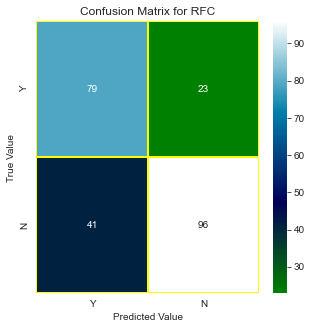

In [148]:
cm = confusion_matrix(y_test, pred_rf1)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="yellow", fmt = ".0f", ax=ax, cmap="ocean", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for RFC')
plt.show()


### ROC-AUC Curve


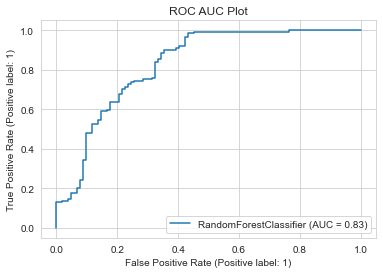

In [149]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

### Saving the Model

In [151]:
import joblib
joblib.dump(rfc1,"Loan_Appln_Status_Predn.pkl")

['Loan_Appln_Status_Predn.pkl']

### Prediction

In [153]:
# Loading the saved model
model=joblib.load("Loan_Appln_Status_Predn.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [154]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted Value","Actual Value"])

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted Value,0,1,0,1,1,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
Actual Value,0,1,1,1,0,1,1,0,1,1,...,1,0,0,1,0,0,0,0,1,1
